## Inspección al terminal de OpenBB
En el presente documento se hará una revisión a la API de OpenBB, un prometedor proyecto que busca brindar datos financieros de manera gratuita y que se puede trabajar tanto desde el terminal como desde un código de Python.

El proceso de instalación es el siguiente:
1. Contar con Python, Anaconda y Visual Studio para C++ (Community 2022 version). Todos agregando al PATH.
2. En el CMD, se debe instalar Git mediante anaconda: `conda install -c anaconda git`.
3. Se debe clonar el repositorio del proyecto OpenBB: `git clone https://github.com/OpenBB-finance/OpenBBTerminal.git`.
4. Nos dirigimos a la carpeta del proyecto: `cd openbbterminal`.
5. Se debe construir el entorno más actual de OpenBB: `conda env create -n obb --file build/conda/conda-3-9-env-full.yaml`.
6. Activamos el entorno: `conda activate obb`.
7. Instalamos algunas dependiencias: `pip install -r requirements-full.txt`.
8. Instalamos los requerimientos: `poetry install`.

Finalmente, ya se puede usar OpenBB terminal dentro de Python. En Visual Studio Code se puede usar la librería `openbb_terminal` siempre y cuando se seleccione como kernel a `obb`.

Más documentación en: `https://openbb-finance.github.io/OpenBBTerminal/`.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from openbb_terminal.api import openbb

En OpenBB hay diversas secciones como: `stocks`, `crypto`, `etf`, `economy`, `forex`, `funds`, `alternative`, `econometrics`, `forecast`, entre otros. Se explorará algunas de las más resaltantes

### Stocks

En la sección de stocks se puede hacer importación de datos, gráficos, análisis cuantitativo, entre otros. Probaré con la serie de Apple. El gráfico más sencillo que puede realizarse es uno de `candle`:

Loading Daily AAPL stock with starting period 2020-07-01 for analysis.

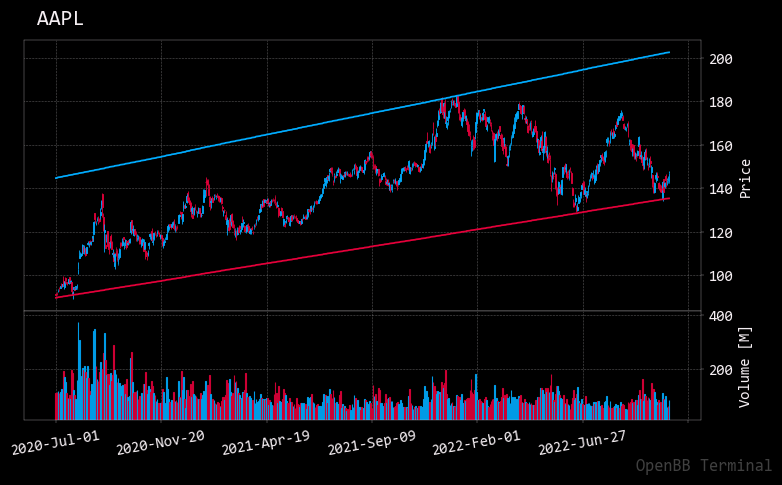

In [50]:
openbb.stocks.candle("AAPL", start_date=datetime(2020, 7, 1), add_trend=True)

Se puede pedir mayor información sobre la empresa, como por ejemplo:

In [56]:
?openbb.stocks.dps

Signature:      openbb.stocks.dps(*args, **kwargs)
Type:           MenuFiller
String form:   
DPS Menu
           
           The api commands of the the menu:
           <openbb>.stocks.dps.prom
           <openbb>.stocks.dps.dpotc
           <...> ocks.dps.spos
           <openbb>.stocks.dps.sidtc
           <openbb>.stocks.dps.psi_sg
           <openbb>.stocks.dps.shorted
File:           c:\users\user\openbbterminal\openbb_terminal\api.py
Docstring:      A filler callable for the menus.
Init docstring: Instantiate the function.
Call docstring: Override the __call__.


In [35]:
dta = openbb.stocks.load("AAPL", start_date=datetime(2020, 1, 1))
dta

Loading Daily AAPL stock with starting period 2020-01-02 for analysis.

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.683571,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.967216,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.548630,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.202721,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.380280,132079200
...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300


In [17]:
?openbb.stocks.candle

Signature:
openbb.stocks.candle(
    data: pandas.core.frame.DataFrame = None,
    use_matplotlib: bool = True,
    intraday: bool = False,
    add_trend: bool = False,
    ma: Optional[Iterable[int]] = None,
    asset_type: str = '',
    start_date: datetime.datetime = datetime.datetime(2019, 10, 19, 1, 1, 25, 805081),
    interval: int = 1440,
    end_date: datetime.datetime = datetime.datetime(2022, 10, 23, 1, 1, 25, 805081),
    prepost: bool = False,
    source: str = 'YahooFinance',
    iexrange: str = 'ytd',
    weekly: bool = False,
    monthly: bool = False,
    external_axes: Optional[List[matplotlib.axes._axes.Axes]] = None,
    raw: bool = False,
)
Docstring:
Shows candle plot of loaded ticker. [Source: Yahoo Finance, IEX Cloud or Alpha Vantage]

Parameters
----------
symbol: str
    Ticker name
data: pd.DataFrame
    Stock dataframe
use_matplotlib: bool
    Flag to use matplotlib instead of interactive plotly chart
intraday: bool
    Flag for intraday data for plotly range